In [1]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import json

/Users/qichen/anaconda3/envs/msprime-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
model = CmdStanModel(stan_file='two_popn_nfixed_model.stan')

21:20:25 - cmdstanpy - INFO - compiling stan file /Users/qichen/Desktop/code/admix_stan/two_popn_dist/two_popn_nfixed_model.stan to exe file /Users/qichen/Desktop/code/admix_stan/two_popn_dist/two_popn_nfixed_model
21:20:53 - cmdstanpy - INFO - compiled model executable: /Users/qichen/Desktop/code/admix_stan/two_popn_dist/two_popn_nfixed_model


In [74]:
mle = model.optimize(data='two_popn_dist_data/two_popn_3000_300.json')
mle.optimized_params_dict['T']

21:21:09 - cmdstanpy - INFO - Chain [1] start processing
21:21:09 - cmdstanpy - INFO - Chain [1] done processing


272.84

In [26]:
n = 10
N_list = [500,1000,2000,3000]
T_list = [50,100,150,200,250,300]
columns = ['method','posterior_mean','lp__','N','T']
out = pd.DataFrame(columns=columns)
for i in range(len(N_list)):
    for j in range(len(T_list)):
        N = N_list[i]
        T = T_list[j]
        with open(f'two_popn_dist_data/two_popn_{N}_{T}.json', 'r') as file:
            data = json.load(file)
        for k in range(n):
            pathfinder=model.pathfinder(data=data)
            out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N],'T':[T]})],ignore_index = True)
            

20:28:27 - cmdstanpy - INFO - Chain [1] start processing
20:28:30 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/x8/k3jsg9l14mg7njszvfns0ls00000gn/T/ipykernel_59386/3848382396.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out,pd.DataFrame({'method':['pathfinder'],'posterior_mean':[pathfinder.draws()[:,2].mean()],'lp__':[pathfinder.draws()[:,1].mean()],'N':[N],'T':[T]})],ignore_index = True)
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
20:28:33 - cmdstanpy - INFO - Chain [1] done processing
20:28:33 - cmdstanpy - INFO - Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing
20:28:37 - cmdstanpy - INFO - Chain [1] start processing
20:28:40 - cmdstanpy - INFO - Chain 

In [27]:
out

,method,posterior_mean,lp__,N,T
0,pathfinder,57.309914,203.365303,500,50
1,pathfinder,57.482413,203.371127,500,50
2,pathfinder,57.197796,203.342142,500,50
3,pathfinder,57.426847,203.375058,500,50
4,pathfinder,57.500502,203.302839,500,50
...,...,...,...,...,...
235,pathfinder,273.698115,380.668276,3000,300
236,pathfinder,272.560543,380.661283,3000,300
237,pathfinder,273.855290,380.665292,3000,300
238,pathfinder,274.091763,380.685721,3000,300


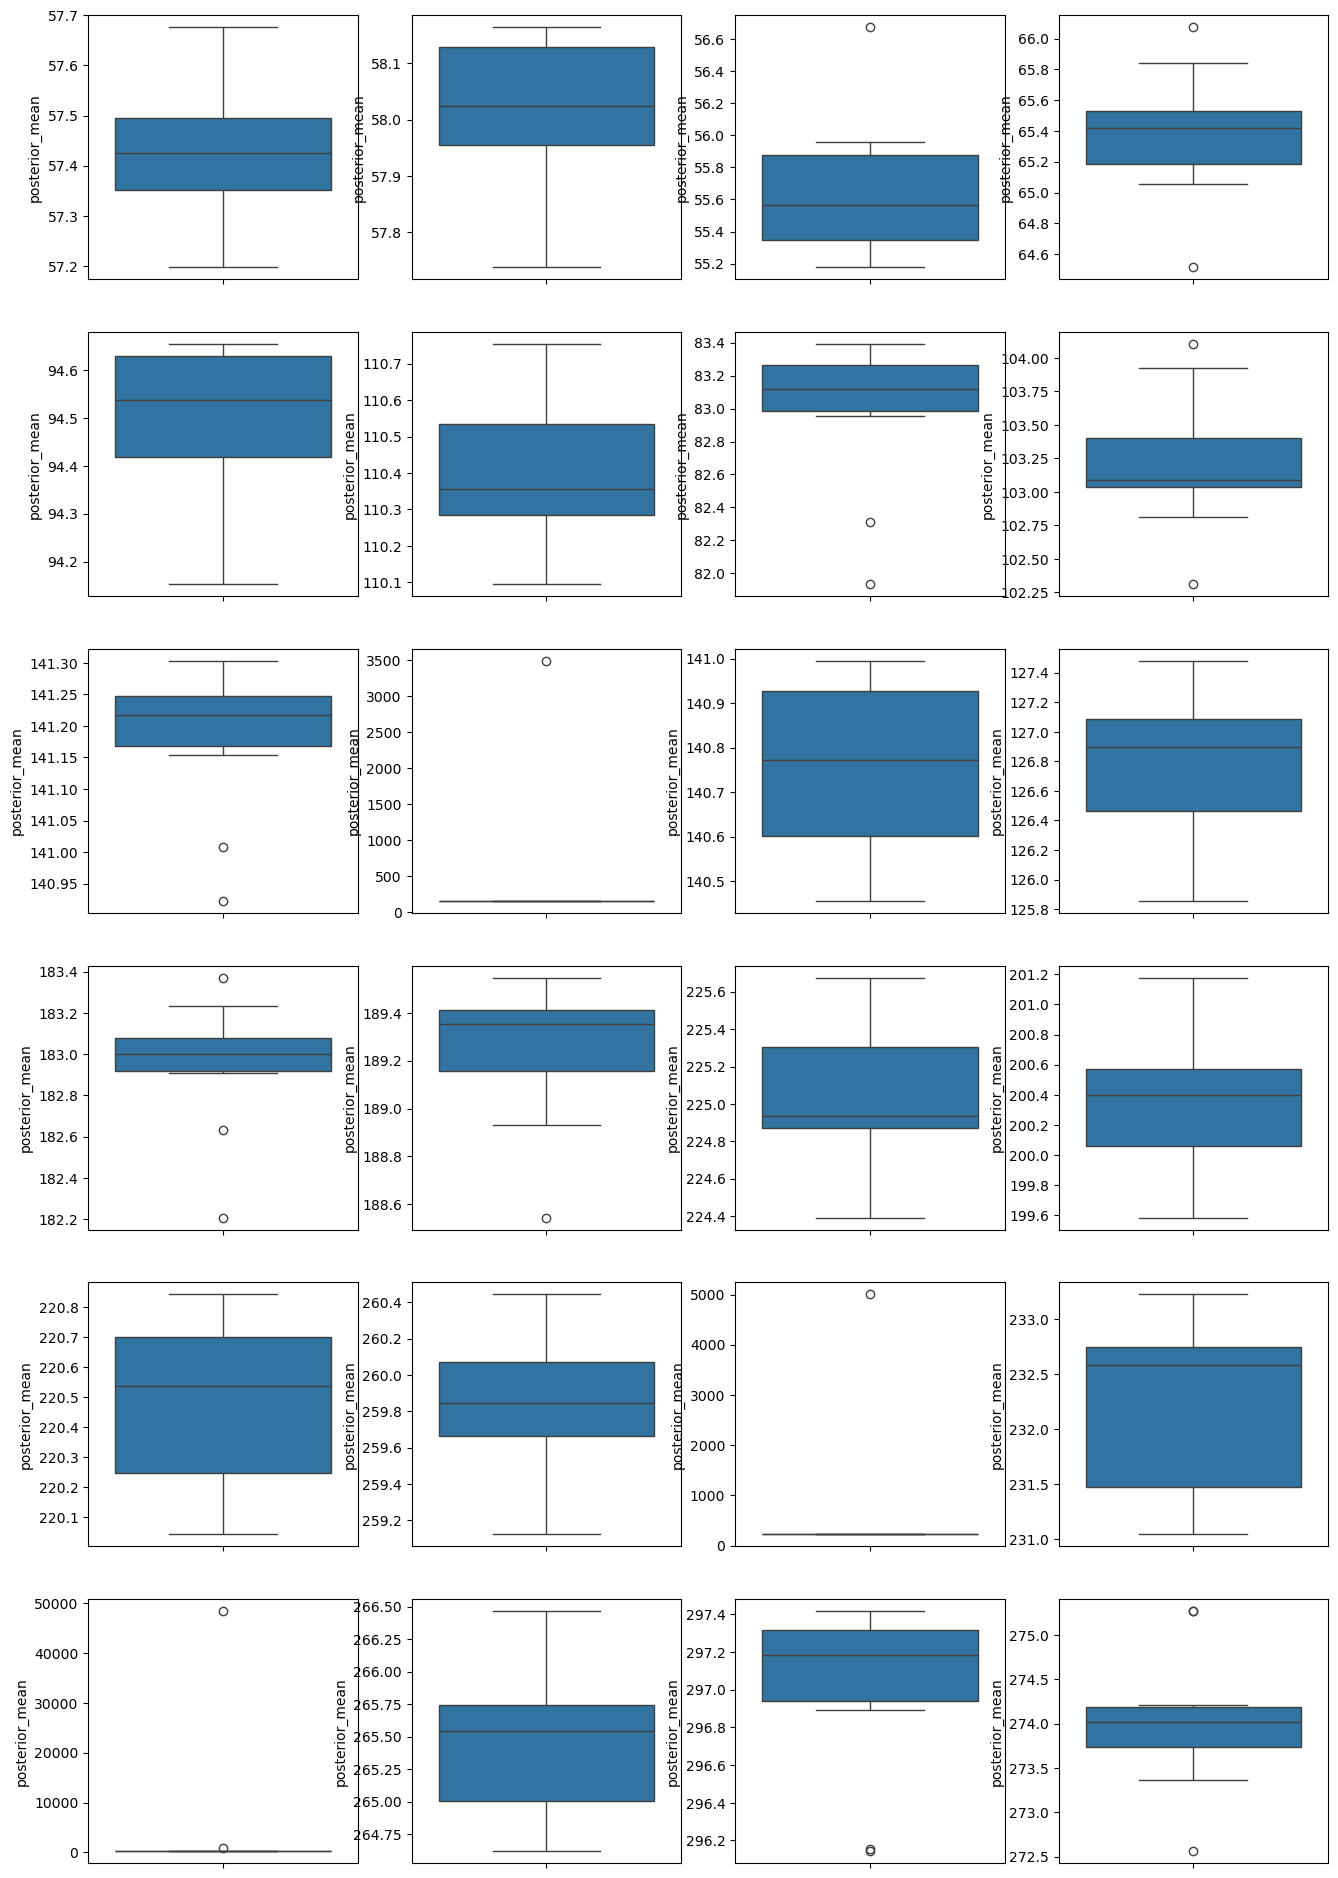

In [56]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 24)) 

for i in range(len(N_list)):
    for j in range(len(T_list)):
        sns.boxplot(out[(out['N']==N_list[i])&(out['T']==T_list[j])]['posterior_mean'],ax = axes[j,i])

In [77]:
out[out['T']==300]

,method,posterior_mean,lp__,N,T
50,pathfinder,256.814827,2051.491640,500,300
51,pathfinder,256.176920,2051.513680,500,300
52,pathfinder,255.776175,2051.539590,500,300
53,pathfinder,255.685638,2051.492150,500,300
54,pathfinder,255.748453,2051.560060,500,300
55,pathfinder,255.950010,2051.465640,500,300
56,pathfinder,918.789924,NaN,500,300
57,pathfinder,48372.790722,NaN,500,300
58,pathfinder,255.539436,2051.537860,500,300
59,pathfinder,255.969434,2051.524640,500,300
